In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv('/content/Banknote-authentication-dataset.csv')
df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [19]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


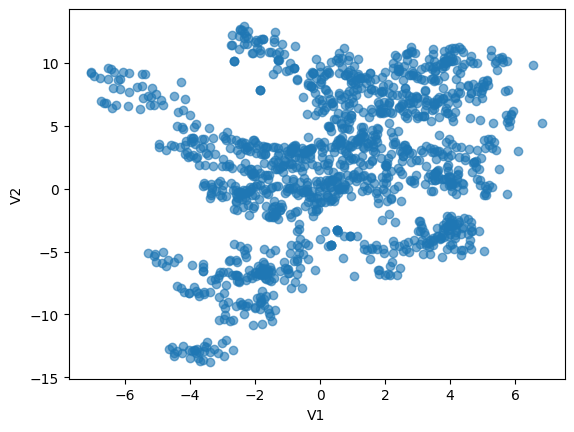

In [20]:
plt.scatter(df.V1,df.V2,alpha=0.6)
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

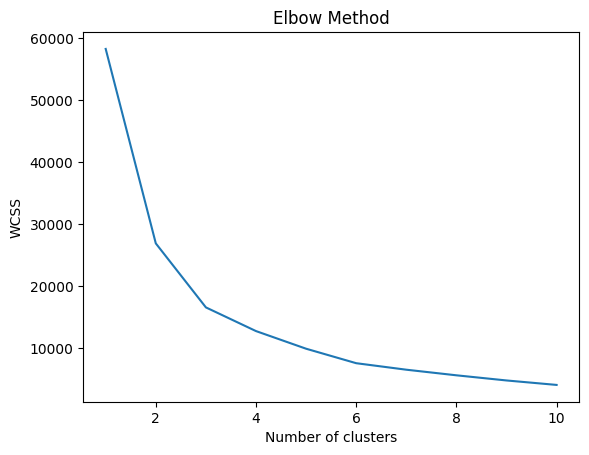

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


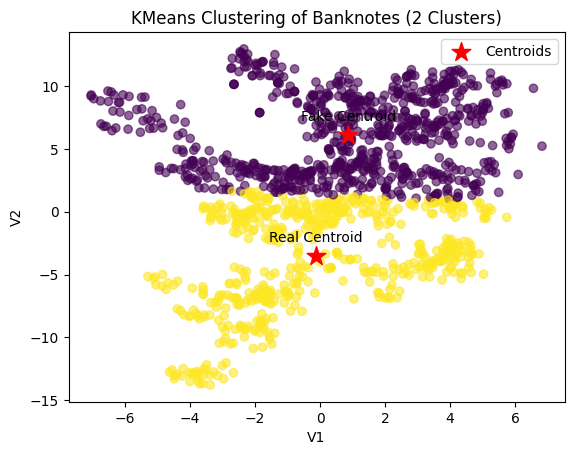

        V1      V2 cluster
0  3.62160  8.6661    Fake
1  4.54590  8.1674    Fake
2  3.86600 -2.6383    Real
3  3.45660  9.5228    Fake
4  0.32924 -4.4552    Real


In [32]:
# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

# Calculate the mean of each cluster
cluster_means = df.groupby('cluster').mean()

# Visualize the clusters
plt.scatter(df['V1'], df['V2'], c=df['cluster'], alpha=0.6)

# Add cluster centers to the plot
plt.scatter(cluster_means['V1'], cluster_means['V2'], s=200, c='red', marker='*', label='Centroids')

# Annotate the centroids with cluster labels (Fake/Real)
# Assuming cluster 0 represents 'Fake' and cluster 1 represents 'Real' - adjust based on your data
plt.annotate('Fake Centroid', (cluster_means['V1'][0], cluster_means['V2'][0]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Real Centroid', (cluster_means['V1'][1], cluster_means['V2'][1]), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel('V1')
plt.ylabel('V2')
plt.title('KMeans Clustering of Banknotes (2 Clusters)')
plt.legend()
plt.show()


#Rename cluster labels to 'Fake' and 'Real' in the dataframe for clarity

df['cluster'] = df['cluster'].map({0: 'Fake', 1: 'Real'})


# Show the first few rows of the dataframe with the new cluster labels
print(df.head())


#Simple Interpretation
The algorithm divided the notes into two groups based on patterns in the data — without knowing which are real or fake.

From the plot, we can guess that:

Notes with higher V2 values (upper purple area) belong to one group — likely fake notes

Notes with lower V2 values (lower yellow area) are grouped into another — likely real notes

The separation between the two groups is clear, so K-Means did a good job finding structure in the data.

#Conclusion
K-Means successfully discovered two distinct groups of banknotes. These clusters likely correspond to real vs. fake notes, even though no label information was used. The plot shows good separation, meaning this method could be useful for detecting counterfeit currency patterns.